In [6]:
# code for scrapting energy spot prices 
# provided by Ward Somer on 09/05/2023

### Steps
1. Paste the URL code as provided below in your web browser. Then change the dates, which are marked yellow, as desired. The first date represents the start date and the second date represents the end date. T00 and T23 represent the hour of the day. It should be noted that there is a deviation of two hours between the datetime in the URL and the datetime from the energy prices. For example, if you want to obtain the energy spot price from datetime 2023-05-09 00:00:00 until 2023-05-09 23:00:00, you should fill in the start date: 2023-05-08T22 and end date: 2023-05-09T22.

for data between 2022-06-01 22:00 to 2022-06-28 22:00: \
https://mijn.easyenergy.com/nl/api/tariff/getapxtariffs?startTimestamp=2022-05-31T22%3A00%3A00.000Z&endTimestamp=2022-06-28T22%3A00%3A00.000Z&grouping=&includeVat=false

for data between 2022-03-21 06:00 to 2022-03-21 18:00: \
https://mijn.easyenergy.com/nl/api/tariff/getapxtariffs?startTimestamp=2022-03-21T06%3A00%3A00.000Z&endTimestamp=2022-03-21T19%3A00%3A00.000Z&grouping=&includeVat=false

for data between 2022-03-10 00:00 to 2022-04-01 00:00: \
https://mijn.easyenergy.com/nl/api/tariff/getapxtariffs?startTimestamp=2022-03-09T22%3A00%3A00.000Z&endTimestamp=2022-03-31T22%3A00%3A00.000Z&grouping=&includeVat=false

for data between 2022-12-01 00:00 to 2022-12-31 00:00: \
https://mijn.easyenergy.com/nl/api/tariff/getapxtariffs?startTimestamp=2022-11-30T22%3A00%3A00.000Z&endTimestamp=2022-12-31T22%3A00%3A00.000Z&grouping=&includeVat=false

2. The following web page will appear when you press enter. Click on the right mouse button and save as XML file with the name: nieuwestroom_energieprijzen. The XML file should be saved in the same folder as the this Python file that is used to transform the XML file to a pandas dataframe. 
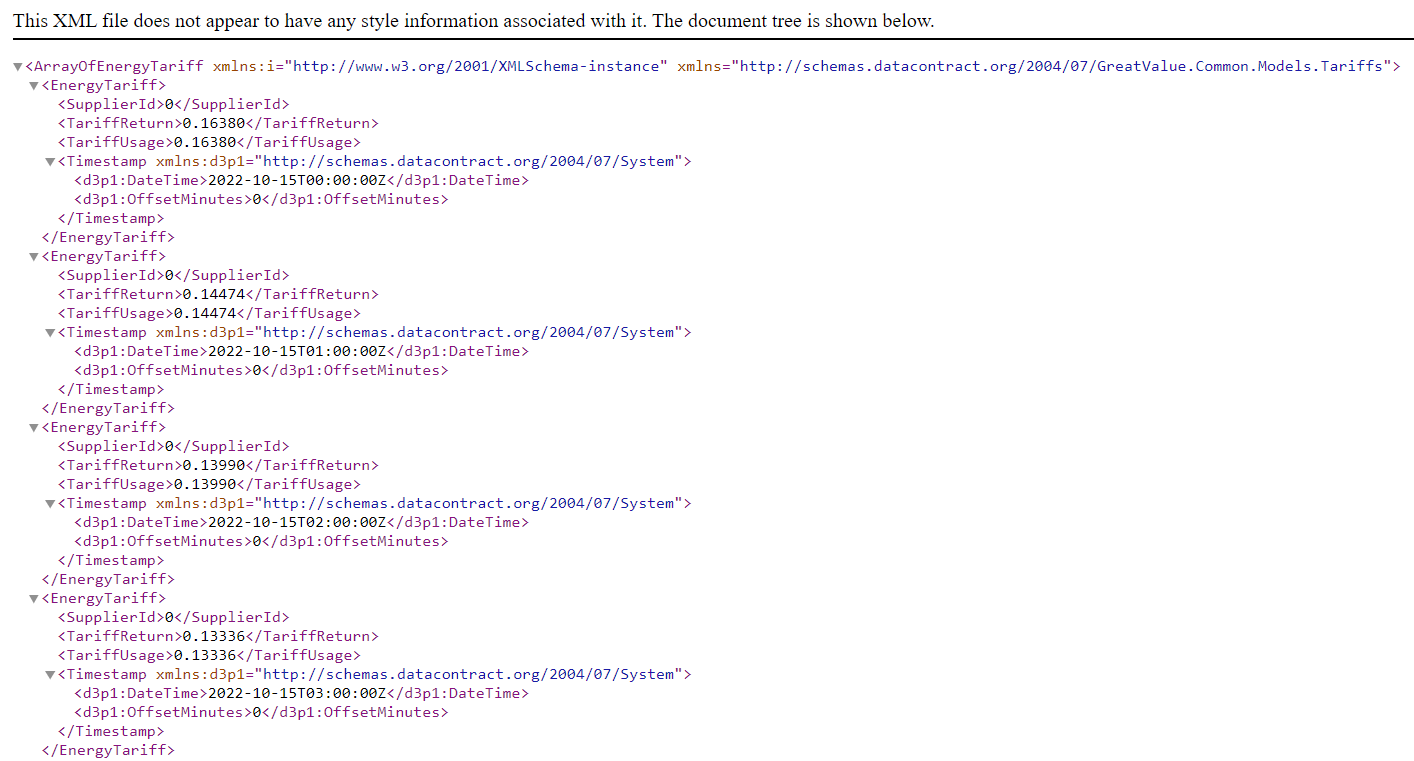

3. Finally, follow the steps in this Jupyter Notebook to obtain a clean dataframe that contain the energy spot prices (Euros/kWh).

In [1]:
import pandas as pd

In [26]:
# Everything should work properly if you named the xml file nieuwestroom_energieprijzen and
# saved it into the same folder as this Python file.
df = pd.read_xml(r'nieuwestroom_energieprijzen_june.xml')
df

,SupplierId,TariffReturn,TariffUsage,Timestamp
0,0,0.22000,0.22000,NaN
1,0,0.20745,0.20745,NaN
2,0,0.19909,0.19909,NaN
3,0,0.18253,0.18253,NaN
4,0,0.18228,0.18228,NaN
...,...,...,...,...
667,0,0.47090,0.47090,NaN
668,0,0.45314,0.45314,NaN
669,0,0.41092,0.41092,NaN
670,0,0.39638,0.39638,NaN


In [29]:
# Specify the index so it matches with the actual time period of the selected data.
index_values = pd.date_range('2022-06-01 00:00:00', '2022-06-28 23:00:00', freq='H')
#index_values = pd.date_range('2022-03-10', '2022-12-31 23:00:00', freq='H')
index_values

DatetimeIndex(['2022-06-01 00:00:00', '2022-06-01 01:00:00',
               '2022-06-01 02:00:00', '2022-06-01 03:00:00',
               '2022-06-01 04:00:00', '2022-06-01 05:00:00',
               '2022-06-01 06:00:00', '2022-06-01 07:00:00',
               '2022-06-01 08:00:00', '2022-06-01 09:00:00',
               ...
               '2022-06-28 14:00:00', '2022-06-28 15:00:00',
               '2022-06-28 16:00:00', '2022-06-28 17:00:00',
               '2022-06-28 18:00:00', '2022-06-28 19:00:00',
               '2022-06-28 20:00:00', '2022-06-28 21:00:00',
               '2022-06-28 22:00:00', '2022-06-28 23:00:00'],
              dtype='datetime64[ns]', length=672, freq='H')

In [30]:
df.index = index_values
df

,SupplierId,TariffReturn,TariffUsage,Timestamp
2022-06-01 00:00:00,0,0.22000,0.22000,NaN
2022-06-01 01:00:00,0,0.20745,0.20745,NaN
2022-06-01 02:00:00,0,0.19909,0.19909,NaN
2022-06-01 03:00:00,0,0.18253,0.18253,NaN
2022-06-01 04:00:00,0,0.18228,0.18228,NaN
...,...,...,...,...
2022-06-28 19:00:00,0,0.47090,0.47090,NaN
2022-06-28 20:00:00,0,0.45314,0.45314,NaN
2022-06-28 21:00:00,0,0.41092,0.41092,NaN
2022-06-28 22:00:00,0,0.39638,0.39638,NaN


In [31]:
series = df['TariffUsage']
series

2022-06-01 00:00:00    0.22000
2022-06-01 01:00:00    0.20745
2022-06-01 02:00:00    0.19909
2022-06-01 03:00:00    0.18253
2022-06-01 04:00:00    0.18228
                        ...   
2022-06-28 19:00:00    0.47090
2022-06-28 20:00:00    0.45314
2022-06-28 21:00:00    0.41092
2022-06-28 22:00:00    0.39638
2022-06-28 23:00:00    0.29500
Freq: H, Name: TariffUsage, Length: 672, dtype: float64

In [32]:
series.rename('Forecasted energy price', inplace=True)

2022-06-01 00:00:00    0.22000
2022-06-01 01:00:00    0.20745
2022-06-01 02:00:00    0.19909
2022-06-01 03:00:00    0.18253
2022-06-01 04:00:00    0.18228
                        ...   
2022-06-28 19:00:00    0.47090
2022-06-28 20:00:00    0.45314
2022-06-28 21:00:00    0.41092
2022-06-28 22:00:00    0.39638
2022-06-28 23:00:00    0.29500
Freq: H, Name: Forecasted energy price, Length: 672, dtype: float64

In [33]:
series_resampled = series.resample('5min').mean()
series_resampled

2022-06-01 00:00:00    0.220
2022-06-01 00:05:00      NaN
2022-06-01 00:10:00      NaN
2022-06-01 00:15:00      NaN
2022-06-01 00:20:00      NaN
                       ...  
2022-06-28 22:40:00      NaN
2022-06-28 22:45:00      NaN
2022-06-28 22:50:00      NaN
2022-06-28 22:55:00      NaN
2022-06-28 23:00:00    0.295
Freq: 5T, Name: Forecasted energy price, Length: 8053, dtype: float64

In [34]:
series_resampled.ffill(inplace=True)
series_resampled

2022-06-01 00:00:00    0.22000
2022-06-01 00:05:00    0.22000
2022-06-01 00:10:00    0.22000
2022-06-01 00:15:00    0.22000
2022-06-01 00:20:00    0.22000
                        ...   
2022-06-28 22:40:00    0.39638
2022-06-28 22:45:00    0.39638
2022-06-28 22:50:00    0.39638
2022-06-28 22:55:00    0.39638
2022-06-28 23:00:00    0.29500
Freq: 5T, Name: Forecasted energy price, Length: 8053, dtype: float64

In [35]:
series_resampled = series_resampled.iloc[:-1]
series_resampled

2022-06-01 00:00:00    0.22000
2022-06-01 00:05:00    0.22000
2022-06-01 00:10:00    0.22000
2022-06-01 00:15:00    0.22000
2022-06-01 00:20:00    0.22000
                        ...   
2022-06-28 22:35:00    0.39638
2022-06-28 22:40:00    0.39638
2022-06-28 22:45:00    0.39638
2022-06-28 22:50:00    0.39638
2022-06-28 22:55:00    0.39638
Freq: 5T, Name: Forecasted energy price, Length: 8052, dtype: float64

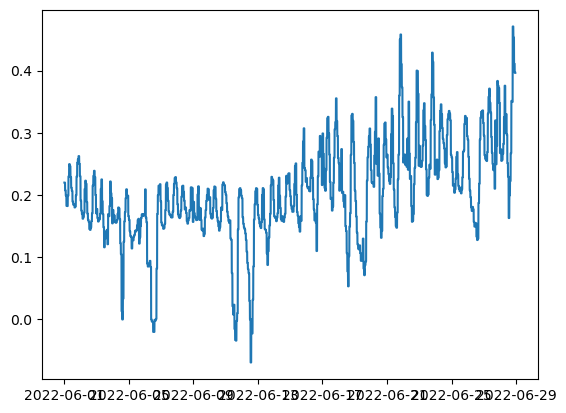

In [36]:
import matplotlib.pyplot as plt
plt.plot(series_resampled)

In [37]:
series_resampled.to_csv('Energy_price__june.csv')